### 1.a.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [50]:
np.random.seed(39) 

In [51]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 1.b.

In [52]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values 
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [53]:
X_normalized = np.zeros_like(X)
for i in range(X.shape[1]):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    X_normalized[:, i] = (X[:, i] - min_val) / (max_val - min_val)

### 1.c.

In [54]:
n_samples = len(X_normalized)
n_train = int(0.8 * n_samples)

indices = np.random.permutation(n_samples)
train_indices = indices[:n_train]
test_indices = indices[n_train:]

X_train = X_normalized[train_indices]
X_test = X_normalized[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

### 1.d.

In [55]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [56]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        
        k_nearest_labels = [label for _, label in k_nearest]
        
        # majority voting
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return np.array(predictions)


In [57]:
n = len(X_train)
max_k = int(np.sqrt(n))
k_values = [k for k in range(1, max_k + 1, 2)][:5]
print(k_values)

[1, 3, 5, 7, 9]


### 1.e.

In [58]:
def compute_metrics(y_true, y_pred):
    classes = np.unique(y_true)
    
    precision_dict = {}
    recall_dict = {}
    
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        precision_dict[cls] = float(precision)
        recall_dict[cls] = float(recall)
    
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    return precision_dict, recall_dict, accuracy

In [59]:
standard_results = {}

for k in k_values:
    print(f"\nEvaluating K={k}...")
    
    # Make predictions
    y_pred = knn_predict(X_train, y_train, X_test, int(k))
    
    # Compute metrics
    precision_dict, recall_dict, accuracy = compute_metrics(y_test, y_pred)
    
    standard_results[k] = {
        'predictions': y_pred,
        'precision': precision_dict,
        'recall': recall_dict,
        'accuracy': accuracy
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision per class: {precision_dict}")
    print(f"  Recall per class: {recall_dict}")


Evaluating K=1...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=3...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=5...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=7...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating 

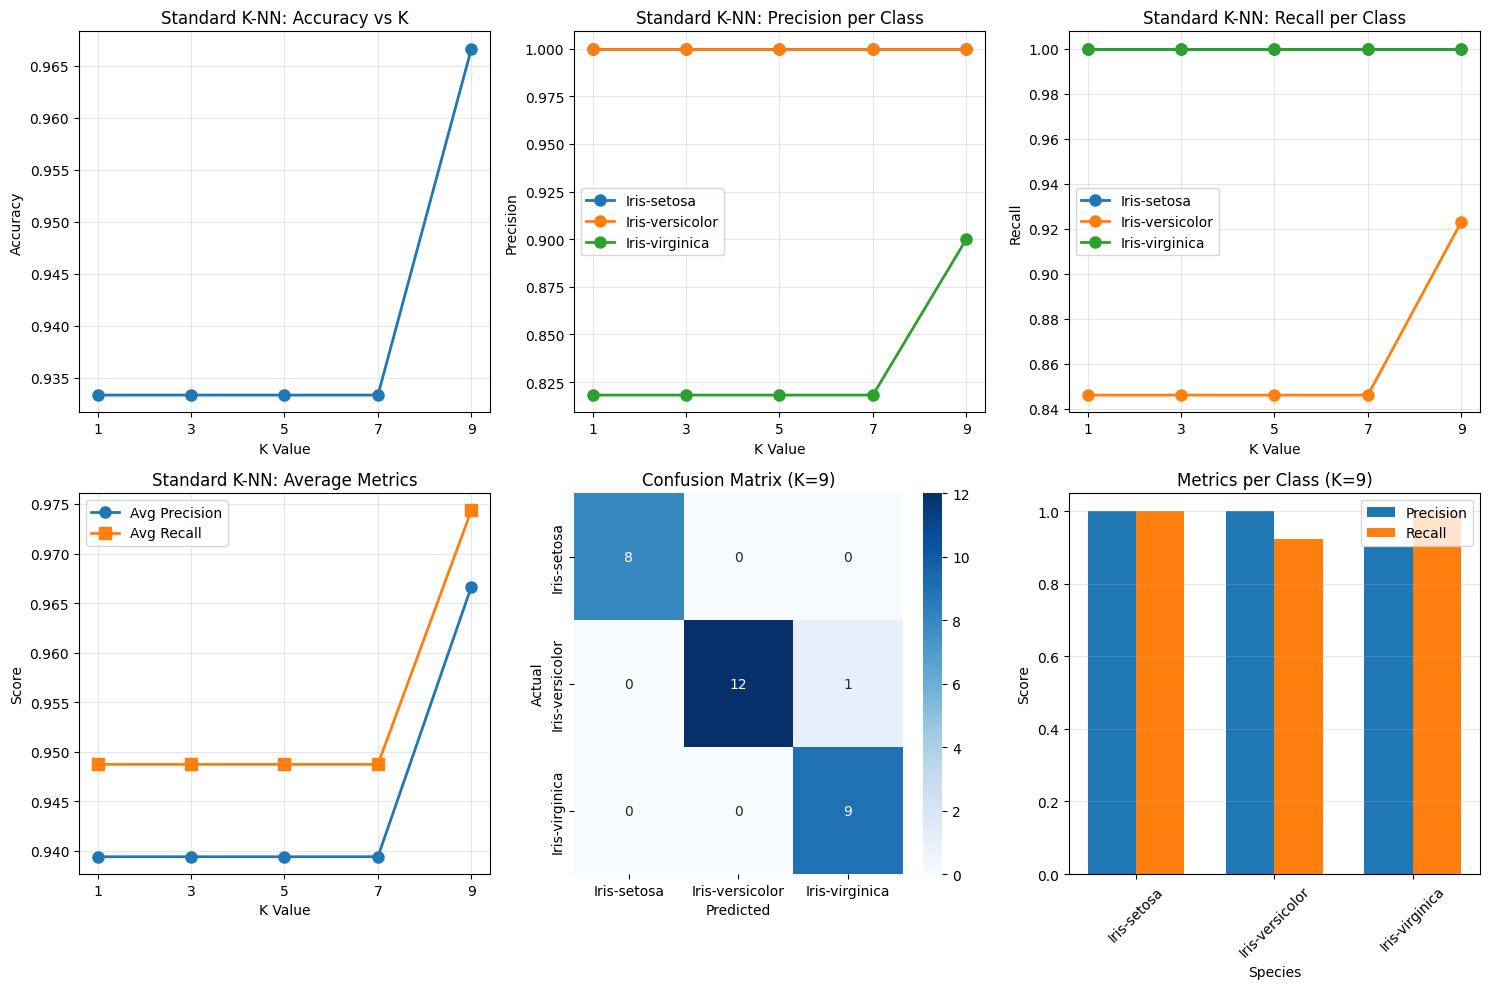


Best K value (standard K-NN): 9
Best accuracy: 0.9667



In [60]:
# 1. Accuracy vs K
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
accuracies = [standard_results[k]['accuracy'] for k in k_values]
plt.plot(k_values, accuracies, 'o-', linewidth=2, markersize=8)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Standard K-NN: Accuracy vs K')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 2. Precision per class
plt.subplot(2, 3, 2)
species = list(standard_results[k_values[0]]['precision'].keys())
for cls in species:
    precisions = [standard_results[k]['precision'][cls] for k in k_values]
    plt.plot(k_values, precisions, 'o-', label=cls, linewidth=2, markersize=8)
plt.xlabel('K Value')
plt.ylabel('Precision')
plt.title('Standard K-NN: Precision per Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 3. Recall per class
plt.subplot(2, 3, 3)
for cls in species:
    recalls = [standard_results[k]['recall'][cls] for k in k_values]
    plt.plot(k_values, recalls, 'o-', label=cls, linewidth=2, markersize=8)
plt.xlabel('K Value')
plt.ylabel('Recall')
plt.title('Standard K-NN: Recall per Class')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 4. Average Precision and Recall
plt.subplot(2, 3, 4)
avg_precisions = [np.mean(list(standard_results[k]['precision'].values())) for k in k_values]
avg_recalls = [np.mean(list(standard_results[k]['recall'].values())) for k in k_values]
plt.plot(k_values, avg_precisions, 'o-', label='Avg Precision', linewidth=2, markersize=8)
plt.plot(k_values, avg_recalls, 's-', label='Avg Recall', linewidth=2, markersize=8)
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('Standard K-NN: Average Metrics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# 5. Confusion Matrix for best K
best_k_standard = max(k_values, key=lambda k: standard_results[k]['accuracy'])
plt.subplot(2, 3, 5)
y_pred_best = standard_results[best_k_standard]['predictions']
conf_matrix = np.zeros((len(species), len(species)), dtype=int)
for i, true_cls in enumerate(species):
    for j, pred_cls in enumerate(species):
        conf_matrix[i, j] = np.sum((y_test == true_cls) & (y_pred_best == pred_cls))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=species, yticklabels=species)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (K={best_k_standard})')

# 6. Bar plot of metrics for best K
plt.subplot(2, 3, 6)
x = np.arange(len(species))
width = 0.35
precisions_best = [standard_results[best_k_standard]['precision'][cls] for cls in species]
recalls_best = [standard_results[best_k_standard]['recall'][cls] for cls in species]
plt.bar(x - width/2, precisions_best, width, label='Precision')
plt.bar(x + width/2, recalls_best, width, label='Recall')
plt.xlabel('Species')
plt.ylabel('Score')
plt.title(f'Metrics per Class (K={best_k_standard})')
plt.xticks(x, species, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
PLOTSDIR = 'plots/'
plt.savefig(PLOTSDIR + '1e_standard_knn_results.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\nBest K value (standard K-NN): {best_k_standard}")
print(f"Best accuracy: {standard_results[best_k_standard]['accuracy']:.4f}")
print()

### 1.f.

In [61]:
def weighted_knn_predict(X_train, y_train, X_test, k, weight_func='inverse'):
    predictions = []
    
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:k]
        
        if k_nearest[0][0] == 0:
            predictions.append(k_nearest[0][1])
            continue
        
        class_weights = {}
        for dist, label in k_nearest:
            if weight_func == 'inverse':
                weight = 1.0 / dist
            elif weight_func == 'inverse_square':
                weight = 1.0 / (dist ** 2)
            else:
                weight = 1.0
            
            class_weights[label] = class_weights.get(label, 0) + weight
        
        predicted_class = max(class_weights.items(), key=lambda x: x[1])[0]
        predictions.append(predicted_class)
    
    return np.array(predictions)

### 1.g.

In [62]:
weighted_results = {
    'inverse': {},
    'inverse_square': {}
}

for weight_type in ['inverse', 'inverse_square']:
    print(f"Weight function: 1/d" if weight_type == 'inverse' else f"Weight function: 1/d²")
    
    for k in k_values:
        print(f"\nEvaluating K={k}...")
        
        y_pred = weighted_knn_predict(X_train, y_train, X_test, k, weight_type)
        
        precision_dict, recall_dict, accuracy = compute_metrics(y_test, y_pred)
        
        weighted_results[weight_type][k] = {
            'predictions': y_pred,
            'precision': precision_dict,
            'recall': recall_dict,
            'accuracy': accuracy
        }
        
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision per class: {precision_dict}")
        print(f"  Recall per class: {recall_dict}")

Weight function: 1/d

Evaluating K=1...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=3...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=5...
  Accuracy: 0.9333
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.8181818181818182}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.8461538461538461, 'Iris-virginica': 1.0}

Evaluating K=7...
  Accuracy: 0.9000
  Precision per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.0, 'Iris-virginica': 0.75}
  Recall per class: {'Iris-setosa': 1.0, 'Iris-versicolor': 0.7692307692307693, 'Iris-virginica': 1.0}

Eval

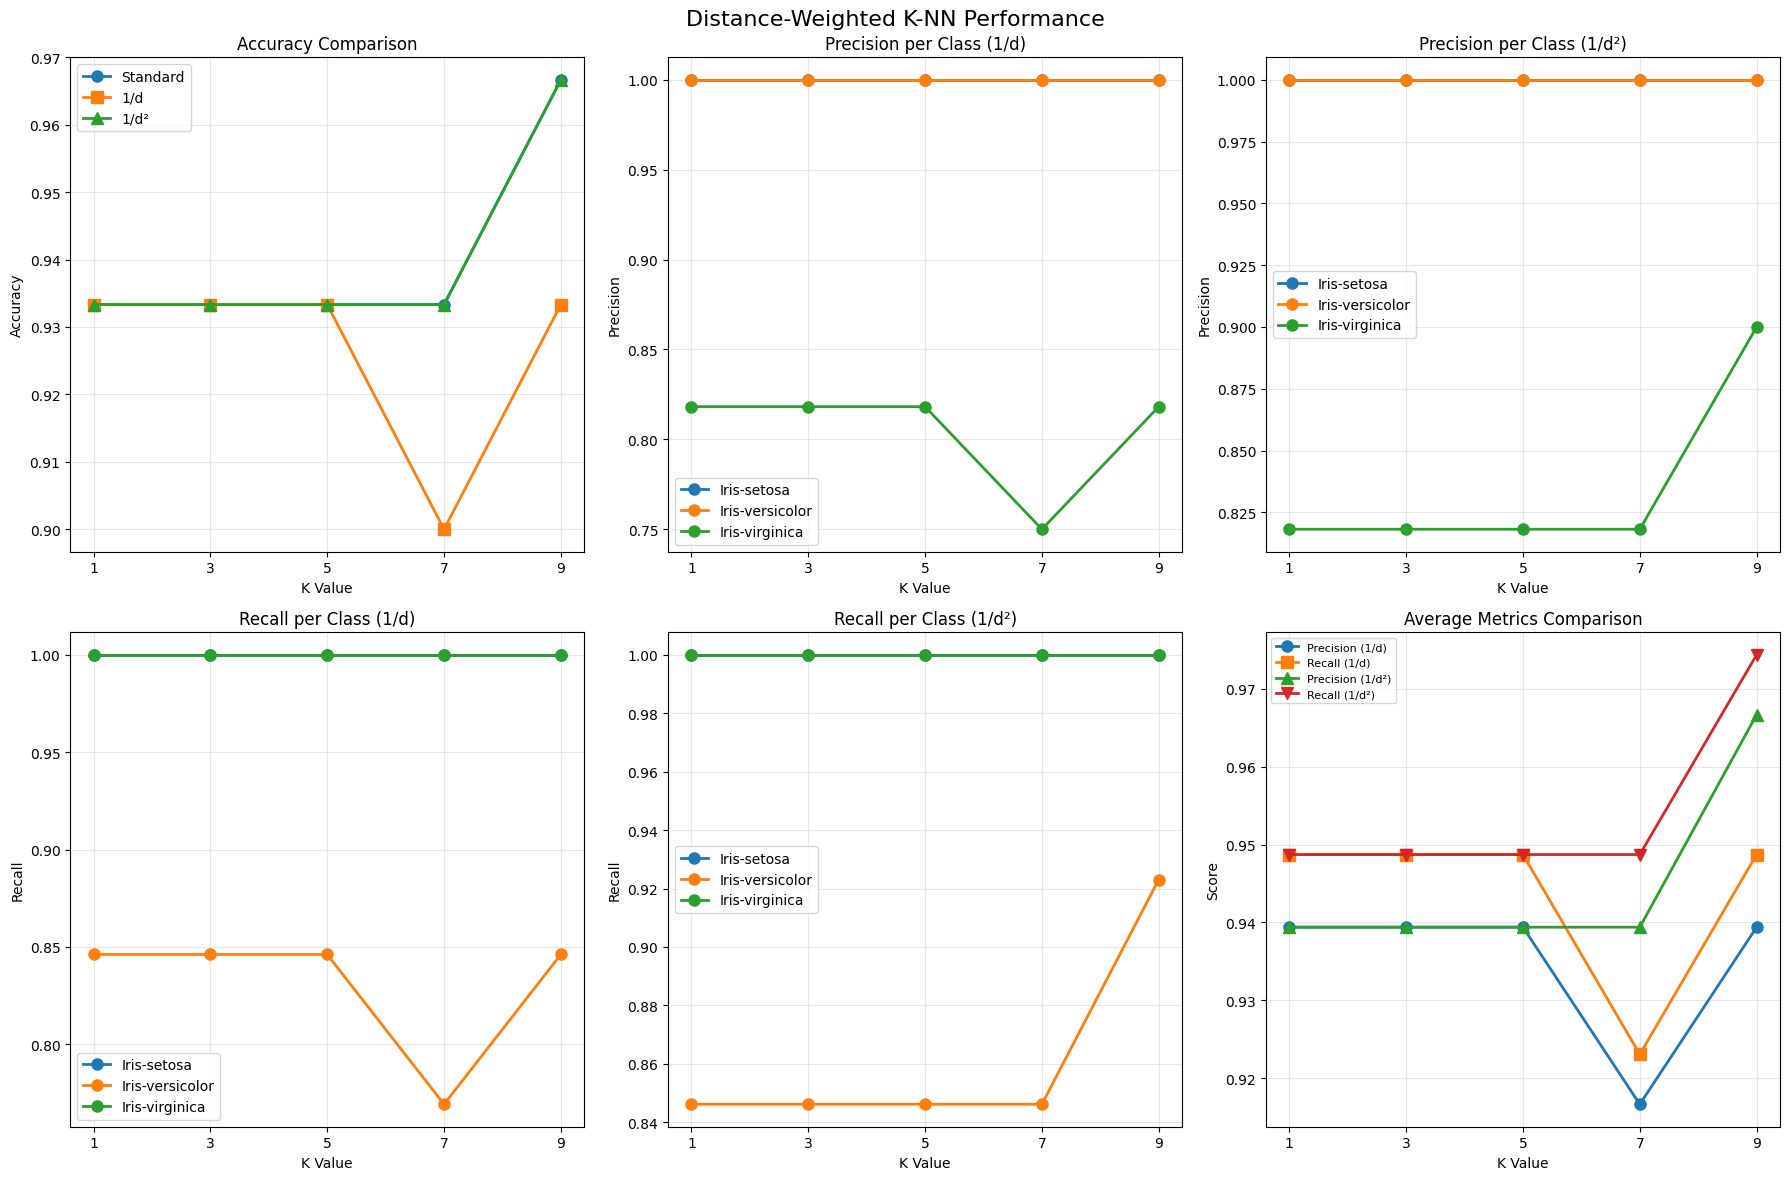

Weighted K-NN (1/d):
  Best K: 1
  Accuracy: 0.9333

Weighted K-NN (1/d²):
  Best K: 9
  Accuracy: 0.9667



In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distance-Weighted K-NN Performance', fontsize=16)

# 1. Accuracy comparison
ax = axes[0, 0]
acc_standard = [standard_results[k]['accuracy'] for k in k_values]
acc_inverse = [weighted_results['inverse'][k]['accuracy'] for k in k_values]
acc_inverse_sq = [weighted_results['inverse_square'][k]['accuracy'] for k in k_values]
ax.plot(k_values, acc_standard, 'o-', label='Standard', linewidth=2, markersize=8)
ax.plot(k_values, acc_inverse, 's-', label='1/d', linewidth=2, markersize=8)
ax.plot(k_values, acc_inverse_sq, '^-', label='1/d²', linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# 2. Precision for 1/d
ax = axes[0, 1]
for cls in species:
    precisions = [weighted_results['inverse'][k]['precision'][cls] for k in k_values]
    ax.plot(k_values, precisions, 'o-', label=cls, linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Precision')
ax.set_title('Precision per Class (1/d)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# 3. Precision for 1/d²
ax = axes[0, 2]
for cls in species:
    precisions = [weighted_results['inverse_square'][k]['precision'][cls] for k in k_values]
    ax.plot(k_values, precisions, 'o-', label=cls, linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Precision')
ax.set_title('Precision per Class (1/d²)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# 4. Recall for 1/d
ax = axes[1, 0]
for cls in species:
    recalls = [weighted_results['inverse'][k]['recall'][cls] for k in k_values]
    ax.plot(k_values, recalls, 'o-', label=cls, linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Recall')
ax.set_title('Recall per Class (1/d)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# 5. Recall for 1/d²
ax = axes[1, 1]
for cls in species:
    recalls = [weighted_results['inverse_square'][k]['recall'][cls] for k in k_values]
    ax.plot(k_values, recalls, 'o-', label=cls, linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Recall')
ax.set_title('Recall per Class (1/d²)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

# 6. Average metrics comparison
ax = axes[1, 2]
avg_prec_inv = [np.mean(list(weighted_results['inverse'][k]['precision'].values())) for k in k_values]
avg_rec_inv = [np.mean(list(weighted_results['inverse'][k]['recall'].values())) for k in k_values]
avg_prec_inv_sq = [np.mean(list(weighted_results['inverse_square'][k]['precision'].values())) for k in k_values]
avg_rec_inv_sq = [np.mean(list(weighted_results['inverse_square'][k]['recall'].values())) for k in k_values]
ax.plot(k_values, avg_prec_inv, 'o-', label='Precision (1/d)', linewidth=2, markersize=8)
ax.plot(k_values, avg_rec_inv, 's-', label='Recall (1/d)', linewidth=2, markersize=8)
ax.plot(k_values, avg_prec_inv_sq, '^-', label='Precision (1/d²)', linewidth=2, markersize=8)
ax.plot(k_values, avg_rec_inv_sq, 'v-', label='Recall (1/d²)', linewidth=2, markersize=8)
ax.set_xlabel('K Value')
ax.set_ylabel('Score')
ax.set_title('Average Metrics Comparison')
ax.legend(fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_xticks(k_values)

plt.tight_layout()
plt.savefig(PLOTSDIR + '1g_weighted_knn_results.png', dpi=100, bbox_inches='tight')
plt.show()

# Find best configurations
best_k_inverse = max(k_values, key=lambda k: weighted_results['inverse'][k]['accuracy'])
best_k_inverse_sq = max(k_values, key=lambda k: weighted_results['inverse_square'][k]['accuracy'])

print(f"Weighted K-NN (1/d):")
print(f"  Best K: {best_k_inverse}")
print(f"  Accuracy: {weighted_results['inverse'][best_k_inverse]['accuracy']:.4f}")
print(f"\nWeighted K-NN (1/d²):")
print(f"  Best K: {best_k_inverse_sq}")
print(f"  Accuracy: {weighted_results['inverse_square'][best_k_inverse_sq]['accuracy']:.4f}")
print()

### 1.h.

In [64]:
# Summary table
print("\nSUMMARY TABLE - BEST K VALUES:")
print("-" * 100)
print(f"{'Method':<30} {'Best K':<10} {'Accuracy':<12} {'Avg Precision':<15} {'Avg Recall':<15}")
print("-" * 100)

methods = [
    ('Standard K-NN', best_k_standard, standard_results[best_k_standard]),
    ('Weighted K-NN (1/d)', best_k_inverse, weighted_results['inverse'][best_k_inverse]),
    ('Weighted K-NN (1/d²)', best_k_inverse_sq, weighted_results['inverse_square'][best_k_inverse_sq])
]

for method_name, k, results in methods:
    avg_prec = np.mean(list(results['precision'].values()))
    avg_rec = np.mean(list(results['recall'].values()))
    print(f"{method_name:<30} {k:<10} {results['accuracy']:<12.4f} {avg_prec:<15.4f} {avg_rec:<15.4f}")

print("-" * 100)

print("\nINTERPRETATION:")

all_methods = [
    ('Standard K-NN', standard_results[best_k_standard]['accuracy'], best_k_standard),
    ('Weighted (1/d)', weighted_results['inverse'][best_k_inverse]['accuracy'], best_k_inverse),
    ('Weighted (1/d²)', weighted_results['inverse_square'][best_k_inverse_sq]['accuracy'], best_k_inverse_sq)
]
best_method = max(all_methods, key=lambda x: x[1])

print(f"\nBEST PERFORMING METHOD: {best_method[0]}")
print(f"  K value: {best_method[2]}")
print(f"  Accuracy: {best_method[1]:.4f}")

print("PER-CLASS PERFORMANCE (BEST K VALUES):")

for cls in species:
    print(f"\n{cls}:")
    print(f"  {'Method':<25} {'Precision':<12} {'Recall':<12}")
    print(f"  {'-'*50}")
    for method_name, k, results in methods:
        prec = results['precision'][cls]
        rec = results['recall'][cls]
        print(f"  {method_name:<25} {prec:<12.4f} {rec:<12.4f}")




SUMMARY TABLE - BEST K VALUES:
----------------------------------------------------------------------------------------------------
Method                         Best K     Accuracy     Avg Precision   Avg Recall     
----------------------------------------------------------------------------------------------------
Standard K-NN                  9          0.9667       0.9667          0.9744         
Weighted K-NN (1/d)            1          0.9333       0.9394          0.9487         
Weighted K-NN (1/d²)           9          0.9667       0.9667          0.9744         
----------------------------------------------------------------------------------------------------

INTERPRETATION:

BEST PERFORMING METHOD: Standard K-NN
  K value: 9
  Accuracy: 0.9667
PER-CLASS PERFORMANCE (BEST K VALUES):

Iris-setosa:
  Method                    Precision    Recall      
  --------------------------------------------------
  Standard K-NN             1.0000       1.0000      
  Weighted K-NN